In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
 

In [27]:
new_df=pd.read_csv('df_for_learn.csv')

I think to create of a model that could predict with a high probability whom the voice on the recording belongs to - a man or a woman. 
To do this, after preparing the data frame and dividing it into a training and test part, using the sklearn library, I tried Logistic Regression, K Nearest Neighbor Algorithm, Support Vector Machines (SVM) -Linear Function, Polynomial Function, Radial Basis Function (RBF), Random Forest Classifier, Decision Tree Classifier.


In [28]:
new_df

,Unnamed: 0,sex,0,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,name
0,0,0,0.446761,1.000000,0.708650,0.275148,-0.326931,0.035959,-0.126270,-0.046101,...,-0.276220,-0.099462,-0.073942,-0.166494,-0.141025,-0.029062,-0.032673,-0.120572,0.015534,afrikaans1
1,1,1,-0.175073,1.000000,0.468584,0.697326,-0.103910,0.140070,-0.092223,-0.216848,...,0.034426,0.077227,0.029660,-0.064787,0.007488,0.028104,-0.027506,-0.017661,0.044688,afrikaans2
2,2,1,0.226795,1.000000,0.978530,0.461327,0.022756,-0.255243,-0.282096,-0.718676,...,-0.209185,-0.172475,-0.186700,-0.083625,0.000158,-0.021762,0.032518,0.007871,-0.157995,afrikaans3
3,3,1,0.198228,1.000000,0.693658,0.319618,0.204532,-0.024993,-0.291632,0.039849,...,-0.088005,0.057741,-0.092203,-0.041910,-0.100221,-0.026283,-0.060107,-0.031624,-0.056250,afrikaans4
4,4,1,0.146315,1.000000,-0.285076,0.602942,-0.000135,0.166546,0.165730,-0.222346,...,0.042835,0.123120,0.038252,-0.001035,0.004171,-0.013771,-0.063483,-0.013650,-0.018764,afrikaans5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2113,0,-0.098380,1.000000,0.413817,-0.142392,-0.031974,0.167398,0.143215,-0.059115,...,-0.090952,0.051026,-0.005045,0.000811,0.036339,0.034270,-0.077677,0.040159,0.113056,wu1
2114,2114,0,-0.151538,1.000000,0.505570,-0.285362,0.312975,-0.497947,-0.266738,0.270303,...,0.058850,-0.016420,-0.042148,0.104352,0.160396,0.040072,-0.019097,0.059903,0.132517,xasonga1
2115,2115,0,-0.566894,0.918641,-0.161488,0.151716,-1.000000,0.780240,-0.821273,-0.030645,...,-0.005600,-0.183333,-0.149983,-0.001289,-0.105308,-0.121910,-0.060802,0.025492,-0.005001,xiang1
2116,2116,1,0.045426,1.000000,0.095569,0.822156,-0.165285,0.372029,-0.094438,0.150133,...,-0.015573,-0.035455,-0.061987,-0.037265,-0.032204,-0.006869,0.007749,0.021216,-0.015609,xiang2


In [29]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
new_df.drop('name',axis=1,inplace=True)

In [10]:
new_df

,sex,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,0,0.446761,1.000000,0.708650,0.275148,-0.326931,0.035959,-0.126270,-0.046101,-0.005190,...,-0.195386,-0.276220,-0.099462,-0.073942,-0.166494,-0.141025,-0.029062,-0.032673,-0.120572,0.015534
1,1,-0.175073,1.000000,0.468584,0.697326,-0.103910,0.140070,-0.092223,-0.216848,-0.061284,...,-0.048814,0.034426,0.077227,0.029660,-0.064787,0.007488,0.028104,-0.027506,-0.017661,0.044688
2,1,0.226795,1.000000,0.978530,0.461327,0.022756,-0.255243,-0.282096,-0.718676,-0.763083,...,-0.268023,-0.209185,-0.172475,-0.186700,-0.083625,0.000158,-0.021762,0.032518,0.007871,-0.157995
3,1,0.198228,1.000000,0.693658,0.319618,0.204532,-0.024993,-0.291632,0.039849,-0.029339,...,0.002356,-0.088005,0.057741,-0.092203,-0.041910,-0.100221,-0.026283,-0.060107,-0.031624,-0.056250
4,1,0.146315,1.000000,-0.285076,0.602942,-0.000135,0.166546,0.165730,-0.222346,0.068625,...,-0.019583,0.042835,0.123120,0.038252,-0.001035,0.004171,-0.013771,-0.063483,-0.013650,-0.018764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0,-0.098380,1.000000,0.413817,-0.142392,-0.031974,0.167398,0.143215,-0.059115,-0.156277,...,-0.145025,-0.090952,0.051026,-0.005045,0.000811,0.036339,0.034270,-0.077677,0.040159,0.113056
2114,0,-0.151538,1.000000,0.505570,-0.285362,0.312975,-0.497947,-0.266738,0.270303,-0.254342,...,-0.008505,0.058850,-0.016420,-0.042148,0.104352,0.160396,0.040072,-0.019097,0.059903,0.132517
2115,0,-0.566894,0.918641,-0.161488,0.151716,-1.000000,0.780240,-0.821273,-0.030645,-0.523217,...,-0.248897,-0.005600,-0.183333,-0.149983,-0.001289,-0.105308,-0.121910,-0.060802,0.025492,-0.005001
2116,1,0.045426,1.000000,0.095569,0.822156,-0.165285,0.372029,-0.094438,0.150133,-0.251055,...,-0.010247,-0.015573,-0.035455,-0.061987,-0.037265,-0.032204,-0.006869,0.007749,0.021216,-0.015609


In [11]:
xData=new_df.iloc[:,1:] #divide into X and Y
yData=new_df.iloc[:,0]
xData.shape, yData.shape

((2118, 32), (2118,))

In [13]:
TRAINSPLIT = 0.8 #divide into train and test

xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(xData, yData, train_size=TRAINSPLIT)
xTrain.shape, yTrain.shape

((1694, 32), (1694,))

In [14]:
regressionModel = LogisticRegression(solver='liblinear')
regressionModel.fit(xTrain,yTrain)
regressionModel.score(xTrain,yTrain)

0.8541912632821723

In [15]:
KNNModel = KNeighborsClassifier(n_neighbors=3)
KNNModel.fit(xTrain,yTrain)
KNNModel.score(xTrain,yTrain)

0.8654073199527745

In [16]:
svmLinearModel=sklearn.svm.SVC(kernel='linear',C=10)
svmLinearModel.fit(xTrain,yTrain)
svmLinearModel.score(xTrain,yTrain)

0.8665879574970484

In [17]:
svmRbfModel=sklearn.svm.SVC(kernel='rbf',C=10)
svmRbfModel.fit(xTrain,yTrain)
svmRbfModel.score(xTrain,yTrain)

0.9421487603305785

In [18]:
svmPolyModel=sklearn.svm.SVC(kernel='poly',C=10000)
svmPolyModel.fit(xTrain,yTrain)
svmPolyModel.score(xTrain,yTrain)

1.0

In [19]:
randomFModel = RandomForestClassifier()
randomFModel.fit(xTrain, yTrain)
randomFModel.score(xTrain,yTrain)

1.0

In [20]:
dTreeModel = DecisionTreeClassifier()
dTreeModel.fit(xTrain, yTrain)
dTreeModel.score(xTrain,yTrain)

1.0


In order to clearly see the difference between the training and test dataset, I decided to visualize them

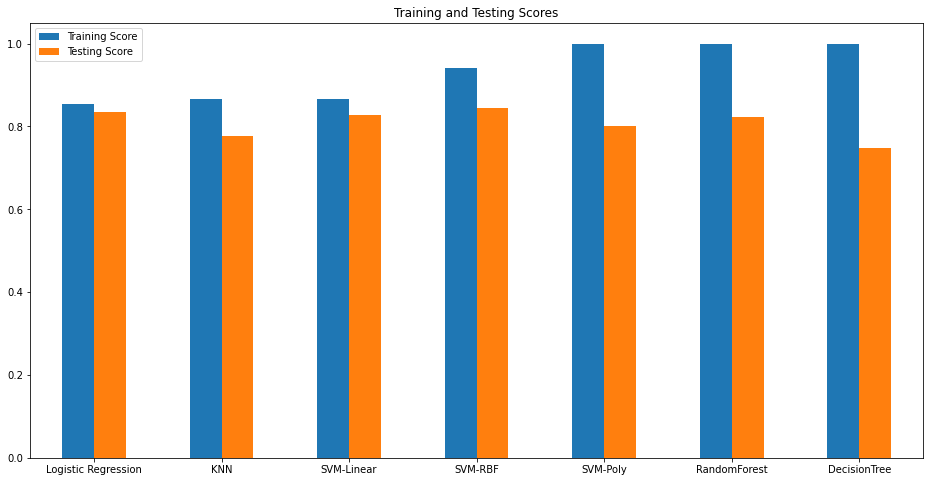

In [30]:
trainScores = [regressionModel.score(xTrain, yTrain), KNNModel.score(xTrain, yTrain), svmLinearModel.score(xTrain, yTrain), svmRbfModel.score(xTrain, yTrain),svmPolyModel.score(xTrain, yTrain), randomFModel.score(xTrain,yTrain), dTreeModel.score(xTrain,yTrain)]
testScores = [regressionModel.score(xTest, yTest), KNNModel.score(xTest, yTest), svmLinearModel.score(xTest, yTest), svmRbfModel.score(xTest, yTest),svmPolyModel.score(xTest, yTest), randomFModel.score(xTest,yTest), dTreeModel.score(xTest,yTest)]
indices = ['Logistic Regression', 'KNN', 'SVM-Linear', 'SVM-RBF','SVM-Poly', 'RandomForest', 'DecisionTree']
scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)
plot = scores.plot.bar(figsize=(16, 8), rot=0)
plt.title('Training and Testing Scores')
plt.show()

In [31]:
scores

,Training Score,Testing Score
Logistic Regression,0.854191,0.834906
KNN,0.865407,0.775943
SVM-Linear,0.866588,0.827830
SVM-RBF,0.942149,0.844340
SVM-Poly,1.000000,0.801887
RandomForest,1.000000,0.823113
DecisionTree,1.000000,0.747642
